In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter

In [78]:
# Grab and process the raw data
text_raw_1 = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
text_raw_1.columns = ['message', 'sentiment']

In [79]:
text_raw_1.head()

,message,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [80]:
# use a count vectorizer, tokenize the words, 

In [81]:
translator = str.maketrans('', '', string.punctuation)
def process_text(t):
    t = t.translate(translator).lower()
    return t

In [82]:
text_raw_1['message'] = text_raw_1.message.apply(lambda x: process_text(x))

In [83]:
text_raw_1 = text_raw_1.dropna()

In [84]:
words = " ".join(text_raw_1.message.values)
words

'a very very very slowmoving aimless movie about a distressed drifting young man   not sure who was more lost  the flat characters or the audience nearly half of whom walked out   attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent   very little music or anything to speak of   the best scene in the movie was when gerardo is trying to find a song that keeps running through his head   the rest of the movie lacks art charm meaning if its about emptiness it works i guess because its empty   wasted two hours   saw the movie today and thought it was a good effort good messages for kids   a bit predictable   loved the casting of jimmy buffet as the science teacher   and those baby owls were adorable   the movie showed a lot of florida at its best made it look very appealing   the songs were the best and the muppets were so hilarious   it was so cool   this is a very

In [85]:
c=Counter(words.split(" "))

In [86]:
feature_list = [item[0] for item in c.items() if item[1] > 3]

In [87]:
for key in feature_list:
    text_raw_1[str(key)] = text_raw_1.message.str.contains(
        ' ' + str(key),
        case=False
    )    

### Using a list of positive and negative words

In [88]:
df_positive = pd.read_csv('positive.csv', header=None)
df_positive.columns = ['positive']
positive = df_positive['positive'].tolist()

In [72]:
df_negative = pd.read_csv('negative2.csv', header=None)
df_negative.columns = ['negative']
df_negative['negative'] = df_negative.negative.apply(lambda x: x.translate(translator))
negative = df_negative['negative'].tolist()

In [73]:
# positive = ['good', 'great', 'awesome', 'best', 'cool', 'interesting', '10', 'decent', 'interesting', 'entertaining', 'fan', 'classic', 'love', 'excellent']
# negative = ['poor', 'bad', 'average',  'suck', 'lost', 'overpriced', 'bored', 'slow', 'boring' ]

In [74]:
# freq_text = text_raw_1.message.apply(lambda x: x.split(" "))
# freq_text.sort_values(ascending=False)

In [89]:
for key in positive:
    text_raw_1[str(key)] = text_raw_1.message.str.contains(
        ' ' + str(key),
        case=False
    )

In [50]:
for key in negative:
    text_raw_1[str(key)] = text_raw_1.message.str.contains(
        ' ' + str(key),
        case=False
    )

### Naive Bayes model

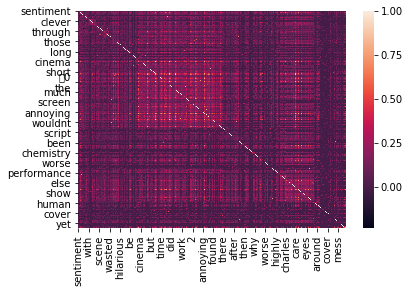

In [12]:
sns.heatmap(text_raw_1.corr())

In [90]:
data = text_raw_1[feature_list + positive]
target = text_raw_1['sentiment']

In [91]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 89


### Secondary dataset: Yelp

In [100]:
df_yelp = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
df_yelp.columns = ['message', 'sentiment']

In [101]:
df_yelp['message'] = df_yelp.message.apply(lambda x: process_text(x))

In [102]:
# df_yelp = df_yelp.message.dropna()

In [103]:
words_2 = " ".join(df_yelp.message.values)

In [104]:
d=Counter(words_2.split(" "))
feature_list_yelp = [item[0] for item in d.items() if item[1] > 3]

for key in feature_list_yelp:
    df_yelp[str(key)] = df_yelp.message.str.contains(
        ' ' + str(key),
        case=False
    )    

In [97]:
# for key in positive:
#     df_yelp[str(key)] = df_yelp.message.str.contains(
#         ' ' + str(key),
#         case=False
#     )

In [105]:
for key in negative:
    df_yelp[str(key)] = df_yelp.message.str.contains(
        ' ' + str(key),
        case=False
    )

In [106]:
secondary_data = df_yelp[feature_list_yelp + negative]
secondary_target = df_yelp['sentiment']

In [107]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(secondary_data, secondary_target)
y_pred_2 = bnb.predict(secondary_data)

print("Number of mislabeled points out of a total {} points : {}".format(
    secondary_data.shape[0],
    (secondary_target != y_pred_2).sum()
))

Number of mislabeled points out of a total 1000 points : 133


Interestingly, the features used on the Amazon set were not as effective at reducing mislaveling of points. Also of note, using the positive feature set of words is better for the IMDB dataset. However, the negative feature of words is more useful in reducing mislabeled points in the yelp dataset. 